In [1]:
# Lab 3, predicting types of movement using accelerometer data

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
"""
https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer


Dataset Information
   --- Data are separated by participant
   --- Each file contains the following information
       ---- sequential number, x acceleration, y acceleration, z acceleration, label 
   --- Labels are codified by numbers
       --- 1: Working at Computer
       --- 2: Standing Up, Walking and Going up\down stairs
       --- 3: Standing
       --- 4: Walking
       --- 5: Going Up\Down Stairs
       --- 6: Walking and Talking with Someone
       --- 7: Talking while Standing
"""

'\nhttps://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer\n\n\nDataset Information\n   --- Data are separated by participant\n   --- Each file contains the following information\n       ---- sequential number, x acceleration, y acceleration, z acceleration, label \n   --- Labels are codified by numbers\n       --- 1: Working at Computer\n       --- 2: Standing Up, Walking and Going up\\down stairs\n       --- 3: Standing\n       --- 4: Walking\n       --- 5: Going Up\\Down Stairs\n       --- 6: Walking and Talking with Someone\n       --- 7: Talking while Standing\n'

In [3]:
accel = pd.read_csv('../data/accelerometer_1.csv', header=None) # there is no header column

In [4]:
accel.head()

,0,1,2,3,4
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [5]:
accel.shape

(162501, 5)

In [6]:
# Beginner Level

In [7]:
# 0. This dataframe has no headers, change that so the column names are
# ['id', 'x', 'y', 'z', 'label']


In [8]:
accel.rename(columns={0:'id', 1:'x', 2:'y', 3:'z', 4:'label' }, inplace=True)

In [9]:
accel.head()

,id,x,y,z,label
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [10]:
# 1. Do we have any missing values?


In [11]:
accel.isnull().sum()

id       0
x        0
y        0
z        0
label    0
dtype: int64

In [12]:
# 2. print the value counts for the label column of accel


In [13]:
accel.label.value_counts()

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
0        1
Name: label, dtype: int64

In [14]:
# 3. Remove any rows where the label column is not 1 - 7


In [15]:
accel[accel.label == 0]

,id,x,y,z,label
162500,162500.0,1922,2387,2078,0


In [16]:
#accel = accel[accel.label != 0] alt version

accel = accel.drop(162500)

In [17]:
accel.label.value_counts()

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
Name: label, dtype: int64

In [18]:
# 4. replace the numbers in the label column with the word counterpart:
    # example 1's become 'Working at Computer', 4's become "Walking"

#        --- 1: Working at Computer
#        --- 2: Standing Up, Walking and Going up\down stairs
#        --- 3: Standing
#        --- 4: Walking
#        --- 5: Going Up\Down Stairs
#        --- 6: Walking and Talking with Someone
#        --- 7: Talking while Standing

In [19]:
accel.head()

,id,x,y,z,label
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [20]:
# species = [iris.target_names[i] for i in iris.target]
# df['species'] = species
replacement_labels = ['Working at Computer',\
                      'Standing Up, Walking and Going up\down stairs',\
                      'Standing',\
                      'Walking',\
                      'Going Up\Down Stairs',\
                      'Walking and Talking with Someone',\
                      'Talking while Standing']


accel.label = accel.label.replace([1,2,3,4,5,6,7], replacement_labels)

In [21]:
accel.head()

,id,x,y,z,label
0,0.0,1502,2215,2153,Working at Computer
1,1.0,1667,2072,2047,Working at Computer
2,2.0,1611,1957,1906,Working at Computer
3,3.0,1601,1939,1831,Working at Computer
4,4.0,1643,1965,1879,Working at Computer


In [22]:
# 5. Plot the number of times each label occurs using a bar char


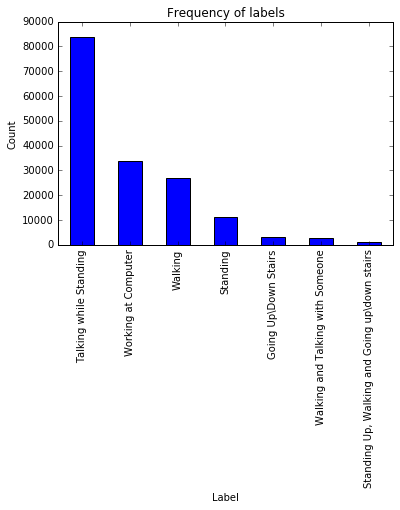

In [23]:
accel.label.value_counts().plot(kind='bar', title = 'Frequency of labels')
plt.xlabel('Label')
plt.ylabel('Count')

In [24]:
# 6. Talking while Standing is the most common label, 
# what is the null accuracy rate for this data set
# The null accuracy is equal to the number of times the most 
# common response element occurs divided by the total number of rows
# Talking while Standing                           0.515372

In [25]:
accel.label.value_counts().apply(lambda x: x/float(accel.id.count()))

Talking while Standing                           0.515372
Working at Computer                              0.207243
Walking                                          0.165292
Standing                                         0.068794
Going Up\Down Stairs                             0.019637
Walking and Talking with Someone                 0.017951
Standing Up, Walking and Going up\down stairs    0.005711
Name: label, dtype: float64

In [26]:
# 7. Make an X and a y variable with X being only the x, y, and z columns
# while y is the label column


In [27]:
X, y = accel[['x', 'y', 'z']], accel['label']

In [154]:
print X.head()
print y.head()

      x     y     z
0  1502  2215  2153
1  1667  2072  2047
2  1611  1957  1906
3  1601  1939  1831
4  1643  1965  1879
0    Working at Computer
1    Working at Computer
2    Working at Computer
3    Working at Computer
4    Working at Computer
Name: label, dtype: object


In [28]:
# 8. Fit a KNN model with 3 neighbors and print the accuracy of that model
# Did you do better than the null model?



0.88682461538461543

In [28]:
from sklearn.neighbors import KNeighborsClassifier 

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
knn.score(X, y)

0.88682461538461543

In [41]:
# 9. print the accuracy of predicting the label column using each column individually
# Ie fit 3 different KNN models, 
# a KNN model with K=3 for each of the x, y, and z columns


x accuracy: 0.648049230769
y accuracy: 0.642196923077
z accuracy: 0.625636923077


In [ ]:
# Intermediate Level

In [32]:
# 10. Create a list called scores that holds 29 different accuracys, 
# one for each value of K between 1 and 29
# Use all three columns for each model
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
scores

[0.96633230769230771,
 0.88388923076923076,
 0.88682461538461543,
 0.87748307692307692,
 0.87505846153846156,
 0.87161230769230769,
 0.87007999999999996,
 0.86812307692307689,
 0.86747692307692303,
 0.86657230769230764,
 0.86561846153846156,
 0.86496615384615383,
 0.86491692307692303,
 0.86371076923076928,
 0.86340307692307694,
 0.86336615384615389,
 0.86305846153846155,
 0.86270153846153841,
 0.86247384615384615,
 0.86219692307692308,
 0.86204307692307691,
 0.8616553846153846,
 0.86154461538461535,
 0.86118769230769232,
 0.86107692307692307,
 0.8609969230769231,
 0.86098461538461535,
 0.86060923076923079,
 0.86037538461538465]

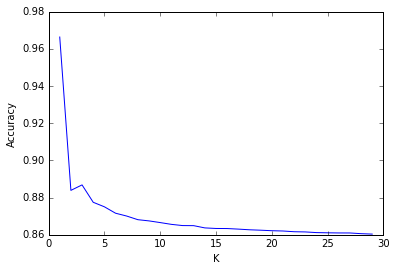

In [37]:
# 11. Make a graph that plots the number of K on the x axis and the accuracy of a KNN model on the y axis


In [42]:
# Why do you think that the accuracy keeps going down? We will discuss this phenomenom more on Wednesday

In [ ]:
# ADVANCED Level

In [52]:
# 12. create a new dataframe called X_scaled which
# is the scaled version of the X dataframe

X_scaled[:5,] # first five rows

/Users/sinanozdemir/anaconda/envs/sfdat26-env/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/sinanozdemir/anaconda/envs/sfdat26-env/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-10.05261103,  -3.94236067,   1.87782031],
       [ -5.99388975,  -7.35315447,   0.09718564],
       [ -7.37139516, -10.09610053,  -2.27139443],
       [ -7.61737826, -10.52543121,  -3.53127745],
       [ -6.58424921,  -9.90528689,  -2.72495232]])

In [53]:
# not scaled

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.score(X, y)

0.88682461538461543

In [45]:
# not scaled

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
knn.score(X_scaled, y)

0.88762461538461535

In [55]:
# 13. Why do you think there was very little difference?

In [63]:
# 14. binarize the response (turn it into a binary response problem)
# create a new column called "binary_label" which is either "stationary", "mobile
# "binary_label is "stationary" if the person is stationary (1, 3, 7)
# "binary_label is "mobile" if the person is mobile (2, 4, 5, 6)


In [65]:
accel.head()

,id,x,y,z,label,binary_label
0,0.0,1502,2215,2153,Working at Computer,stationary
1,1.0,1667,2072,2047,Working at Computer,stationary
2,2.0,1611,1957,1906,Working at Computer,stationary
3,3.0,1601,1939,1831,Working at Computer,stationary
4,4.0,1643,1965,1879,Working at Computer,stationary


In [69]:
# 15. find the null accuracy of the new binary problem

# stationary    0.791409

stationary    0.791409
mobile        0.208591
Name: binary_label, dtype: float64

In [73]:
# 16. create a new variable, "y_binary" which is the binary_label column


In [74]:
# 17. Fit a KNN with K=3 to this binary problem and print out the accuracy


0.95848